<a href="https://colab.research.google.com/github/Madu39627/Analysis-of-Non-Stationarity-and-Spurious-Regression-in-Time-Series/blob/main/Another_copy_of_Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


In [3]:
np.random.seed(42)

# Features: e.g., lagged returns, indicators, volume
X = np.random.randn(1000, 5)

# Target: next-period return
y = np.random.randn(1000, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer for regression
])


In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mse']
)


In [9]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.1127 - mse: 1.1127 - val_loss: 0.8436 - val_mse: 0.8436
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0515 - mse: 1.0515 - val_loss: 0.8387 - val_mse: 0.8387
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1185 - mse: 1.1185 - val_loss: 0.8375 - val_mse: 0.8375
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1469 - mse: 1.1469 - val_loss: 0.8360 - val_mse: 0.8360
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0283 - mse: 1.0283 - val_loss: 0.8318 - val_mse: 0.8318
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0081 - mse: 1.0081 - val_loss: 0.8329 - val_mse: 0.8329
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0093 - mse: 1.0093 - val_loss: 0.8328 - val_mse: 0.8328
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0016 - mse: 1.0016 - val_loss: 0.8335 - val_mse: 0.8335
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0162 - mse:

In [10]:
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", test_mse)


Test MSE: 1.060727834701538


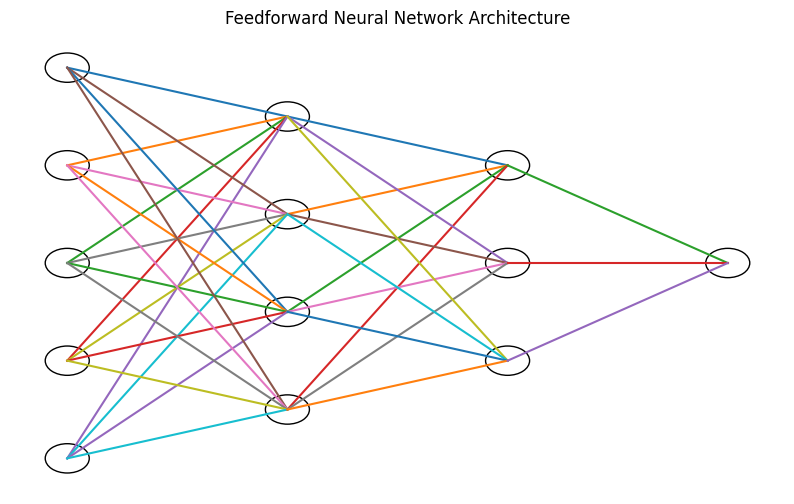

In [11]:
import matplotlib.pyplot as plt

def draw_neural_network(layer_sizes):
    fig, ax = plt.subplots(figsize=(10, 6))

    x_spacing = 1.5
    y_spacing = 1.0

    for layer_idx, layer_size in enumerate(layer_sizes):
        x = layer_idx * x_spacing
        y_offset = (layer_size - 1) * y_spacing / 2

        # Draw neurons
        for neuron_idx in range(layer_size):
            y = y_offset - neuron_idx * y_spacing
            circle = plt.Circle((x, y), 0.15, fill=False)
            ax.add_patch(circle)

            # Draw connections
            if layer_idx > 0:
                prev_size = layer_sizes[layer_idx - 1]
                prev_y_offset = (prev_size - 1) * y_spacing / 2
                for prev_neuron in range(prev_size):
                    prev_y = prev_y_offset - prev_neuron * y_spacing
                    ax.plot([x - x_spacing, x], [prev_y, y])

    ax.axis('off')
    plt.title("Feedforward Neural Network Architecture")
    plt.show()

# Example: 5 inputs → 2 hidden layers → 1 output
draw_neural_network([5, 4, 3, 1])


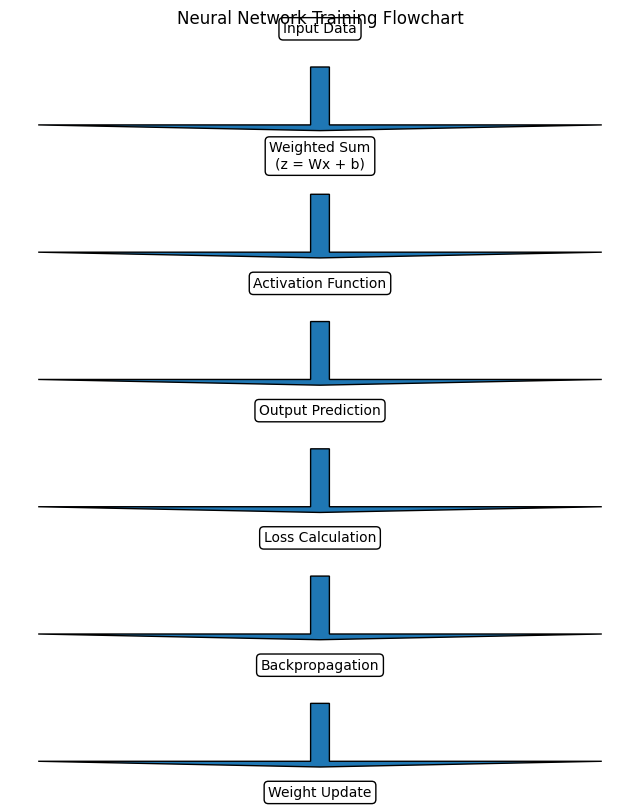

In [12]:
import matplotlib.pyplot as plt

steps = [
    "Input Data",
    "Weighted Sum\n(z = Wx + b)",
    "Activation Function",
    "Output Prediction",
    "Loss Calculation",
    "Backpropagation",
    "Weight Update"
]

fig, ax = plt.subplots(figsize=(8, 10))

y_positions = range(len(steps), 0, -1)

for step, y in zip(steps, y_positions):
    ax.text(0.5, y, step, ha='center', va='center',
            bbox=dict(boxstyle="round", fill=False))

    if y > 1:
        ax.arrow(0.5, y - 0.3, 0, -0.5, head_width=0.03, length_includes_head=True)

ax.axis('off')
plt.title("Neural Network Training Flowchart")
plt.show()


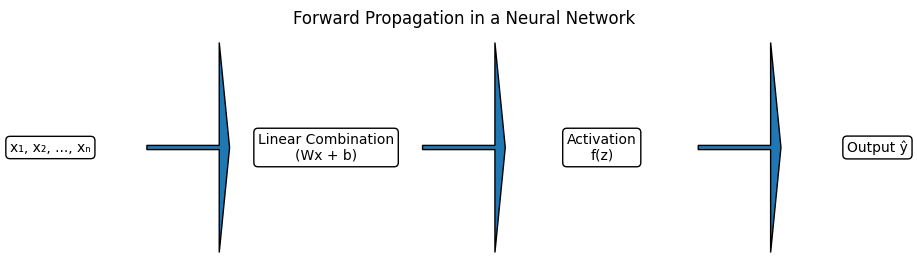

In [13]:
import matplotlib.pyplot as plt

labels = [
    "x₁, x₂, ..., xₙ",
    "Linear Combination\n(Wx + b)",
    "Activation\nf(z)",
    "Output ŷ"
]

fig, ax = plt.subplots(figsize=(9, 3))

for i, label in enumerate(labels):
    ax.text(i * 2, 0, label, ha='center', va='center',
            bbox=dict(boxstyle="round", fill=False))

    if i > 0:
        ax.arrow((i - 1) * 2 + 0.7, 0, 0.6, 0,
                 head_width=0.05, length_includes_head=True)

ax.axis('off')
plt.title("Forward Propagation in a Neural Network")
plt.show()
